In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2xhdXJlbnQvTmV4dGNsb3VkL0xBVVJFTlQvTElWUkVTL3NpdGVfcmVncmVzc2lvbl9weXRob24vY29ycmVjdGlvbg=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

/var/folders/rw/lcb4hvdj44z2zh_2scz_3xgh0000gq/T/ipykernel_81832/2869396569.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/opt/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1728049825.3314297, "/opt/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1728049825.3348482, "/opt/miniconda3/lib/python3.12/zipimport.py": 1728049824.153947, "/opt/miniconda3/lib/python3.12/codecs.py": 1728049823.7001593, "/opt/miniconda3/lib/python3.12/encodings/aliases.py": 1728049824.5312598, "/opt/miniconda3/lib/python3.12/encodings/__init__.py": 1728049824.5277886, "/opt/miniconda3/lib/python3.12/encodings/utf_8.py": 1728049824.9295616, "/opt/miniconda3/lib/python3.12/abc.py": 1728049823.647853, "/opt/miniconda3/lib/python3.12/io.py": 1728049823.8195863, "/opt/miniconda3/lib/python3.12/stat.py": 1728049824.0119774, "/opt/miniconda3/lib/python3.12/_collections_abc.py": 1728049823.6009316, "/opt/miniconda3/lib/python3.12/genericpath.py": 1728049823.7784452, "/opt/miniconda3/lib/python3.12/posixpath.py": 1728049823.912881, "/opt/miniconda3/lib/python3.12/os.py": 1728049823.8794641, "/opt/miniconda3/lib/python3.

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [3]:
n = 100
np.random.seed(48967365)
X = np.random.choice(['A', 'B', 'C'], size=n, replace=True)
Y = np.zeros(n, dtype=int)
np.random.seed(487365)
Y[X == 'A'] = np.random.binomial(1, 0.95, size=np.sum(X == 'A'))
np.random.seed(4878365)
Y[X == 'B'] = np.random.binomial(1, 0.95, size=np.sum(X == 'B'))
np.random.seed(4653965)
Y[X == 'C'] = np.random.binomial(1, 0.05, size=np.sum(X == 'C'))
donnees = pd.DataFrame({'Y': Y, 'X': X})
print(donnees.head())

   Y  X
0  1  A
1  0  C
2  1  A
3  1  B
4  0  A


In [4]:
model1 = smf.logit('Y ~ X', data=donnees).fit()
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.297451
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Tue, 04 Feb 2025   Pseudo R-squ.:                  0.5521
Time:                        11:06:38   Log-Likelihood:                -29.745
converged:                       True   LL-Null:                       -66.406
Covariance Type:            nonrobust   LLR p-value:                 1.197e-16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9459      0.478      4.070      0.000       1.009       2.883
X[T.B]         0.5798      0.

In [5]:
model2 = smf.logit('Y ~ C(X, Treatment(reference="C"))', data=donnees).fit()
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.297451
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Tue, 04 Feb 2025   Pseudo R-squ.:                  0.5521
Time:                        11:06:38   Log-Likelihood:                -29.745
converged:                       True   LL-Null:                       -66.406
Covariance Type:            nonrobust   LLR p-value:                 1.197e-16
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -2.7408      0.730 

In [6]:
lr_test_model1 = model1.llr
lr_test_model2 = model2.llr

print("Test de rapport de vraisemblance pour model1:")
print(f"LR stat: {lr_test_model1:.4f}, p-value: {model1.llr_pvalue:.4f}")

print("\nTest de rapport de vraisemblance pour model2:")
print(f"LR stat: {lr_test_model2:.4f}, p-value: {model2.llr_pvalue:.4f}")

Test de rapport de vraisemblance pour model1:
LR stat: 73.3227, p-value: 0.0000

Test de rapport de vraisemblance pour model2:
LR stat: 73.3227, p-value: 0.0000


In [7]:
np.random.seed(1234)
X = np.concatenate([np.random.uniform(-1, 0, 50), np.random.uniform(0, 1, 50)])
Y = np.concatenate([np.zeros(50), np.ones(50)])
df = pd.DataFrame({'X': X, 'Y': Y})
print(df.head())

          X    Y
0 -0.808481  0.0
1 -0.377891  0.0
2 -0.562272  0.0
3 -0.214641  0.0
4 -0.220024  0.0


In [8]:
beta = np.arange(0, 100, 0.01)
def log_vrais(X, Y, beta):
    LV = np.zeros(len(beta))
    for i in range(len(beta)):
        Pbeta = np.exp(beta[i] * X) / (1 + np.exp(beta[i] * X))
        LV[i] = np.sum(Y * X * beta[i] - np.log(1 + np.exp(X * beta[i])))
    return LV
LL = log_vrais(df['X'], df['Y'], beta)

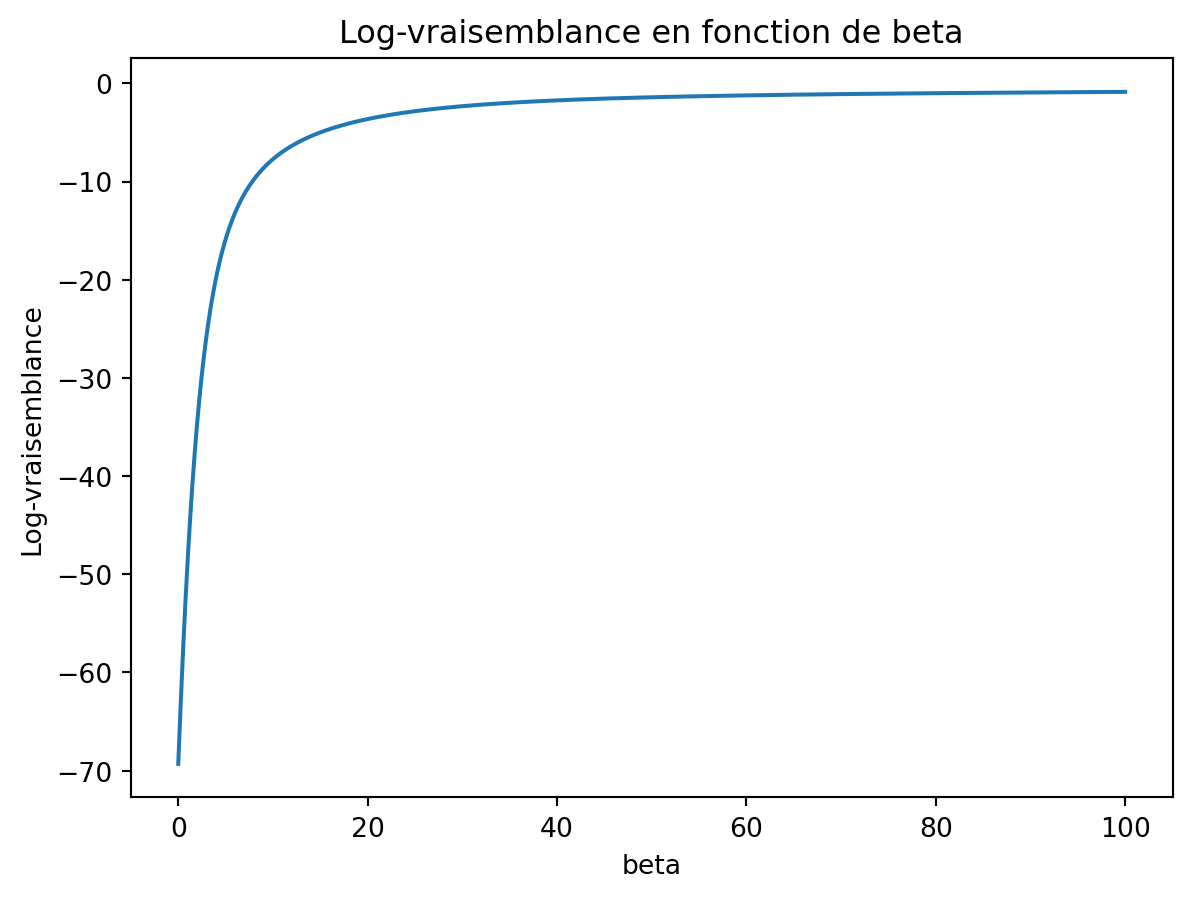

In [9]:
plt.plot(beta,LL)
plt.xlabel('beta')
plt.ylabel('Log-vraisemblance')
plt.title('Log-vraisemblance en fonction de beta')
plt.show()

In [10]:
#| warning: true

model = smf.logit('Y ~ X - 1', data=df).fit()
print(model.params)

         Current function value: 0.000000
         Iterations: 35
X    1801.824972
dtype: float64


/opt/miniconda3/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


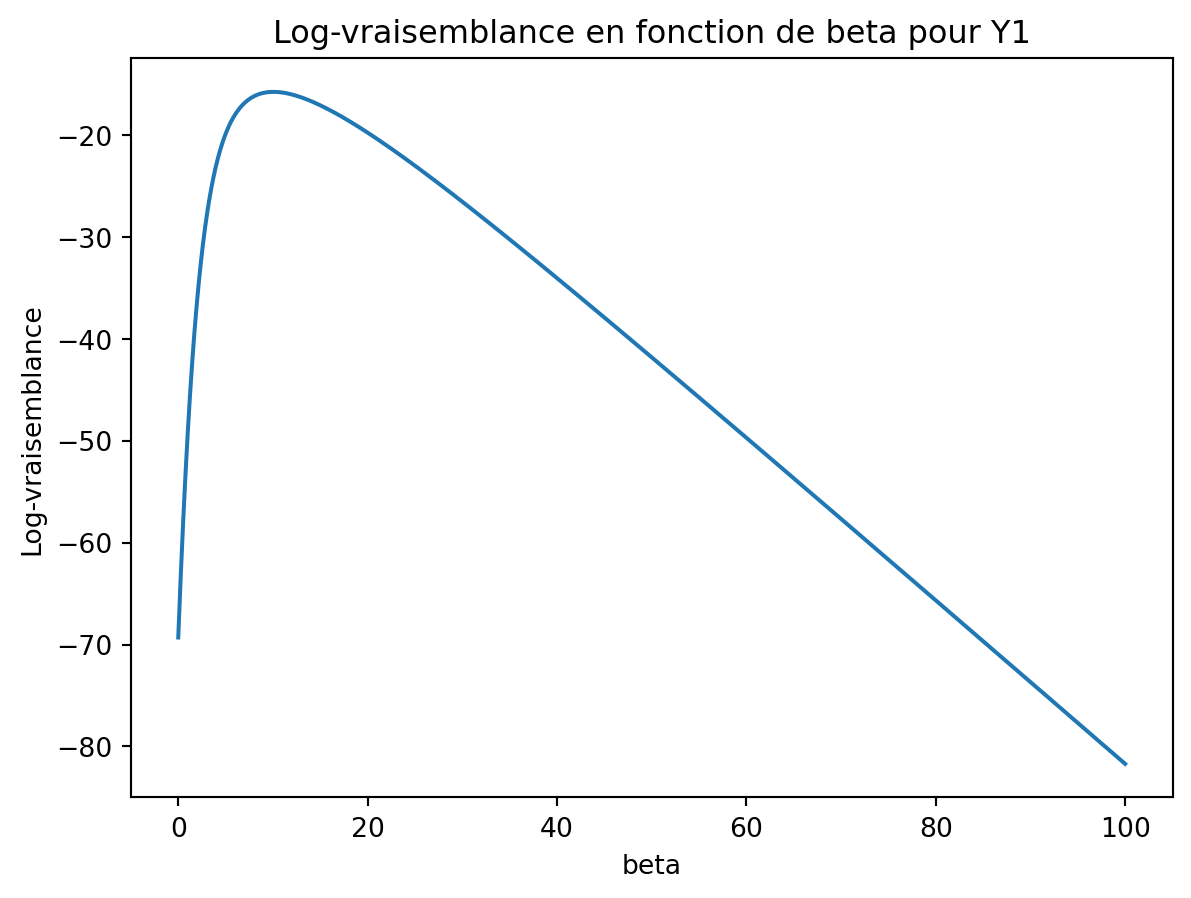

In [11]:
Y1 = Y.copy()
Y1[0] = 1
LL1 = log_vrais(X, Y1, beta)
plt.plot(beta, LL1)
plt.xlabel('beta')
plt.ylabel('Log-vraisemblance')
plt.title('Log-vraisemblance en fonction de beta pour Y1')
plt.show()

In [12]:
panne = pd.read_csv("../donnees/panne.txt", sep=" ")
print(panne.head())

   etat  age marque
0     0    4      A
1     0    2      C
2     0    3      C
3     0    9      B
4     0    7      B


In [13]:
model = smf.logit('etat ~ age+marque', data=panne).fit()

Optimization terminated successfully.
         Current function value: 0.659124
         Iterations 5


In [14]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                   etat   No. Observations:                   33
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            3
Date:                Tue, 04 Feb 2025   Pseudo R-squ.:                 0.04845
Time:                        11:06:50   Log-Likelihood:                -21.751
converged:                       True   LL-Null:                       -22.859
Covariance Type:            nonrobust   LLR p-value:                    0.5290
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4781      0.833      0.574      0.566      -1.155       2.111
marque[T.B]    -0.4194      0.814     -0.515      0.607      -2.015       1.177
marque[T.C]    -1.4561      1.054     -1.382    

In [15]:
wald_tests = model.wald_test_terms()
print("Tests de Wald pour chaque coefficient:")
print(wald_tests)

Tests de Wald pour chaque coefficient:
                              chi2              P>chi2  df constraint
Intercept   [[0.3293833811483461]]  0.5660224013616977              1
marque      [[1.9306493813691281]]  0.3808595181236274              2
age        [[0.02182485519152971]]  0.8825539788968159              1


/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


In [16]:
def lr_test(full_model, reduced_model):
    lr_stat = 2 * (full_model.llf - reduced_model.llf)
    p_value = chi2.sf(lr_stat, df=full_model.df_model - reduced_model.df_model)
    return lr_stat, p_value

# Liste des variables explicatives
variables = panne.columns.drop('etat')

# Effectuer les tests de rapport de vraisemblance pour chaque variable
lr_results = {}
for var in variables:
    formula_reduced = 'etat ~ ' + ' + '.join(variables.drop(var))
    reduced_model = smf.logit(formula_reduced, data=panne).fit(disp=0)
    lr_stat, p_value = lr_test(model, reduced_model)
    lr_results[var] = {'LR stat': lr_stat, 'p-value': p_value}

# Afficher les résultats des tests de rapport de vraisemblance
print("Tests de rapport de vraisemblance pour chaque variable:")
for var, result in lr_results.items():
    print(f"{var}: LR stat = {result['LR stat']:.4f}, p-value = {result['p-value']:.4f}")

Tests de rapport de vraisemblance pour chaque variable:
age: LR stat = 0.0219, p-value = 0.8824
marque: LR stat = 2.0956, p-value = 0.3507


In [17]:
model1 = smf.logit('etat ~ C(marque, Treatment(reference="C"))', data=panne).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.659456
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   etat   No. Observations:                   33
Model:                          Logit   Df Residuals:                       30
Method:                           MLE   Df Model:                            2
Date:                Tue, 04 Feb 2025   Pseudo R-squ.:                 0.04798
Time:                        11:06:50   Log-Likelihood:                -21.762
converged:                       True   LL-Null:                       -22.859
Covariance Type:            nonrobust   LLR p-value:                    0.3340
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -0.9163      0.837     -1.095      0.273      -2.556       0.724
C(marque, Treatment(reference="C"))[T.A]     1.4759      1.045      1.412      0.158      -0.573       3.525
C(marque, Treatment(reference="C"))[T.B]     1.0498      0.984      1.067      0.286      -0.878       2.978
============================================================================================================
"""